# Стохастический метод треугольников

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import sys

import scipy.stats as sts

from numpy.linalg import norm

#sys.path.insert(0, "../Zeudel, Gauss methods/")
from uigm import AdaptiveFDA, UniversalFDA, UniversalStochasticFDA, Gradient

plt.rcParams['figure.figsize'] = (16, 10)

In [2]:
plt.rcParams['figure.figsize'] = (16, 10)

In [3]:
A = np.array([[1, 2], [2, 3]])
b = np.array([1, 2])
x_expl = np.array([1, 0])
x0_rn = np.array([0.1, 0.2])
x0_smp = np.array([0.1, 0.2])
eps = 0.05

# зададим нормально распределенную случайную величину
sigma = 5.
norm_rv = sts.norm(loc=0, scale=sigma)

# ||Ax - b||^2
def func1(x):
    return np.linalg.norm(np.dot(A, x) - b, ord = 2)**2


def gradFunc1(x, func1, eps = 0) :
    return 2*A.transpose() @ (A @ x - b)

def func2(x):
    return np.linalg.norm(np.dot(A, x) - b, ord = 2)

def gradFunc2(x, func2, eps = 0) :
    if np.array_equal(A @ x - b, np.zeros((len(b)))) :
        return 0
    else :
        return A.transpose() @ (A @ x - b) / norm(A @ x - b, ord = 2)
    
def func3(x):
    return func1(x) + func2(x)

def gradFunc3(x, func3, eps = 0):
    return gradFunc1(x, func3, eps) + gradFunc2(x, func3, eps)

def noisyGrad1(x, func1, eps = 0):
    return gradFunc1(x, func1, eps) + norm_rv.rvs(size = x.shape)

def noisyGrad2(x, func2, eps = 0):
    return gradFunc2(x, func2, eps) + norm_rv.rvs(size = x.shape)

def noisyGrad3(x, func3, eps = 0):
    return gradFunc3(x, func3, eps) + norm_rv.rvs(size = x.shape)

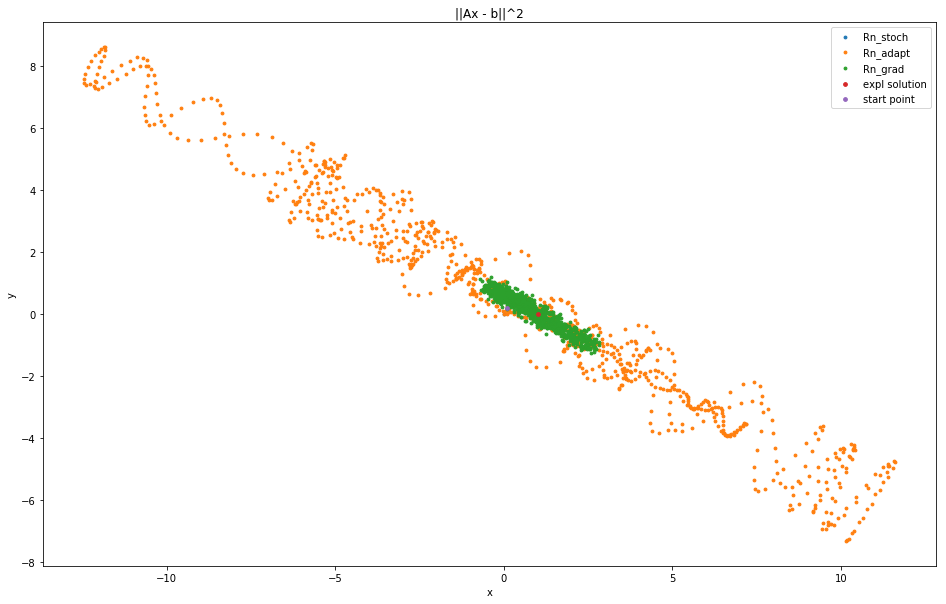

In [8]:
L = 36

xk_rn_univ   = UniversalFDA(func2, x0_rn, eps, num_of_steps = 1000, grad = noisyGrad3, set_type = "rn")
xk_rn_stoch   = UniversalStochasticFDA(func1, x0_rn, eps, num_of_steps = 1000, grad = noisyGrad1, set_type = "rn")
xk_grad = Gradient(func3, x0_rn, eps, L, num_of_steps = 1000, grad = noisyGrad1, set_type = "rn")

plt.scatter([xk_rn_stoch[i][0] for i in range(0, len(xk_rn_stoch))], [xk_rn_stoch[i][1] for i in range(0, len(xk_rn_stoch))], label = "Rn_stoch", s=8)
plt.scatter([xk_rn_adapt[i][0] for i in range(0, len(xk_rn_adapt))], [xk_rn_adapt[i][1] for i in range(0, len(xk_rn_adapt))], label = "Rn_adapt", s=8)
plt.scatter([xk_grad[i][0] for i in range(0, len(xk_grad))], [xk_grad[i][1] for i in range(0, len(xk_grad))], label = "Rn_grad", s=8)

plt.scatter(x_expl[0], x_expl[1], label = "expl solution", s = 14)
plt.scatter(x0_rn[0],  x0_rn[1],  label = "start point",   s = 14)

plt.xlabel("x")
plt.ylabel("y")
plt.title("||Ax - b||^2")
plt.legend()

In [9]:
def ln_diff(x, target):
    return np.log((target(x) - target(x_expl))/(target(x0_rn) - target(x_expl)))

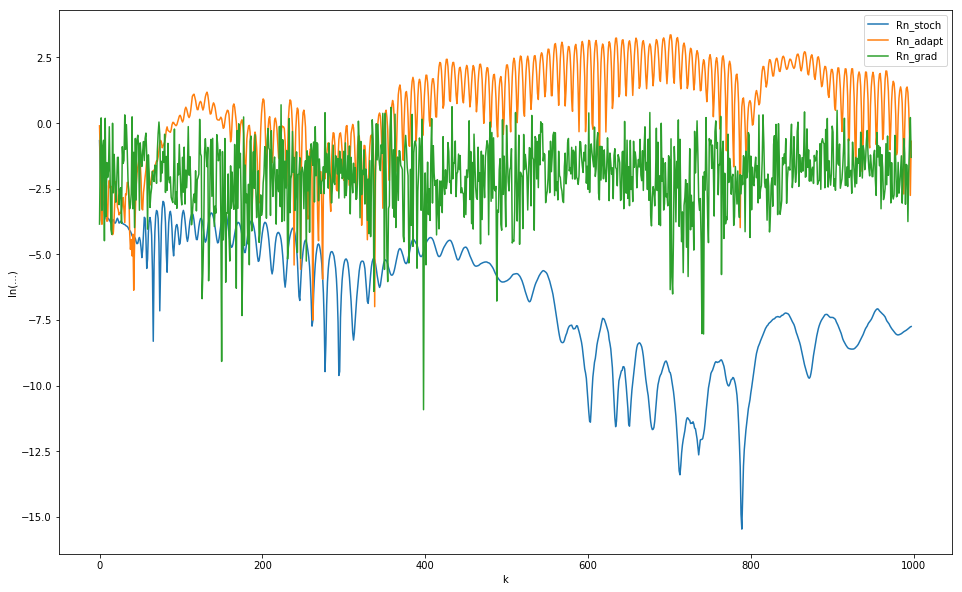

In [10]:
plt.plot([ln_diff(xk_rn_stoch[i], func1) for i in range(3, len(xk_rn_univ))], label = "Rn_stoch")
plt.plot([ln_diff(xk_rn_adapt[i], func1) for i in range(3, len(xk_rn_adapt))], label = "Rn_adapt")
plt.plot([ln_diff(xk_grad[i], func1) for i in range(3, len(xk_grad))], label = "Rn_grad")
plt.xlabel("k")
plt.ylabel("ln(...)")
plt.legend()

In [11]:
print("Стохастический метод: ", "f(x) = ", func1(xk_rn_stoch[-1]))
print("Универсальный метод: ", "f(x) = ", func1(xk_rn_univ[-1]))
print("Градиентный метод: ", "f(x) = ", func1(xk_grad[-1]))

Стохастический метод:  f(x) =  0.0007282893138867394
Универсальный метод:  f(x) =  0.016213514061806236
Градиентный метод:  f(x) =  0.45820739229020324


In [12]:
N = 200 # размерность пространства

# генерируем случайные A и b
uniform_rv = sts.uniform(-100, 200) # Равномерное распределение от -100 до 100
A = uniform_rv.rvs(size = (N, N))
b = uniform_rv.rvs(size = N)
x0_rn = np.zeros(N)

x_expl = np.linalg.inv(A) @ b

L = max(abs(np.linalg.eig(2 * A.transpose() @ A)[0]))


In [13]:
xk_rn_univ   = UniversalFDA(func2, x0_rn, eps, num_of_steps = 1000, grad = noisyGrad3, set_type = "rn")
xk_rn_stoch   = UniversalStochasticFDA(func2, x0_rn, eps, num_of_steps = 1000, grad = noisyGrad2, set_type = "rn")
xk_grad = Gradient(func2, x0_rn, eps, L, num_of_steps = 1000, grad = noisyGrad2, set_type = "rn")

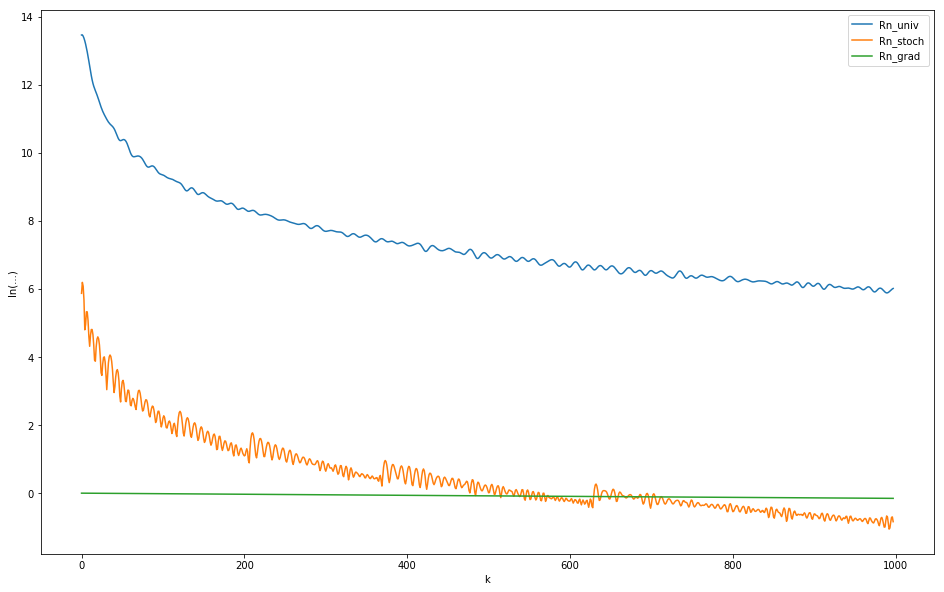

In [14]:
plt.plot([ln_diff(xk_rn_univ[i], func2) for i in range(3, len(xk_rn_univ))], label = "Rn_univ")
plt.plot([ln_diff(xk_rn_stoch[i], func2) for i in range(3, len(xk_rn_stoch))], label = "Rn_stoch")
plt.plot([ln_diff(xk_grad[i], func2) for i in range(3, len(xk_grad))], label = "Rn_grad")
plt.xlabel("k")
plt.ylabel("ln(...)")
plt.legend()

In [15]:
print("Стохастический метод: ", "f(x) = ", func2(xk_rn_stoch[-1]))
print("Универсальный метод: ", "f(x) = ", func2(xk_rn_univ[-1]))
print("Градиентный метод: ", "f(x) = ", func2(xk_grad[-1]))

Стохастический метод:  f(x) =  363.21681968614837
Универсальный метод:  f(x) =  343777.79357952945
Градиентный метод:  f(x) =  720.6481329565302
